# Chapter 1 - Exercises

### Install Pacakges needed

In [1]:
install.packages("faraway")
install.packages("ggplot2")
install.packages("tidyr")

Installing package into ‘/home/jeremyfbuss/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jeremyfbuss/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jeremyfbuss/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



### Load Libraries needed

In [2]:
library(tidyr)

## 1. Explore teengamb

In [3]:
data(teengamb, package="faraway")
head(teengamb)

,sex,status,income,verbal,gamble
,<int>,<int>,<dbl>,<int>,<dbl>
1,1,51,2.00,8,0.0
2,1,28,2.50,8,0.0
3,1,37,2.00,6,0.0
4,1,28,7.00,4,7.3
5,1,65,2.00,8,19.6
6,1,61,3.47,6,0.1


In [4]:
# Change the categorical labels from 0 to male and 1 to female
teengamb$sex <- factor(teengamb$sex)
levels(teengamb$sex) <- c("male","female")

In [5]:
summary(teengamb)

     sex         status          income           verbal          gamble     
 male  :28   Min.   :18.00   Min.   : 0.600   Min.   : 1.00   Min.   :  0.0  
 female:19   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.: 6.00   1st Qu.:  1.1  
             Median :43.00   Median : 3.250   Median : 7.00   Median :  6.0  
             Mean   :45.23   Mean   : 4.642   Mean   : 6.66   Mean   : 19.3  
             3rd Qu.:61.50   3rd Qu.: 6.210   3rd Qu.: 8.00   3rd Qu.: 19.4  
             Max.   :75.00   Max.   :15.000   Max.   :10.00   Max.   :156.0  

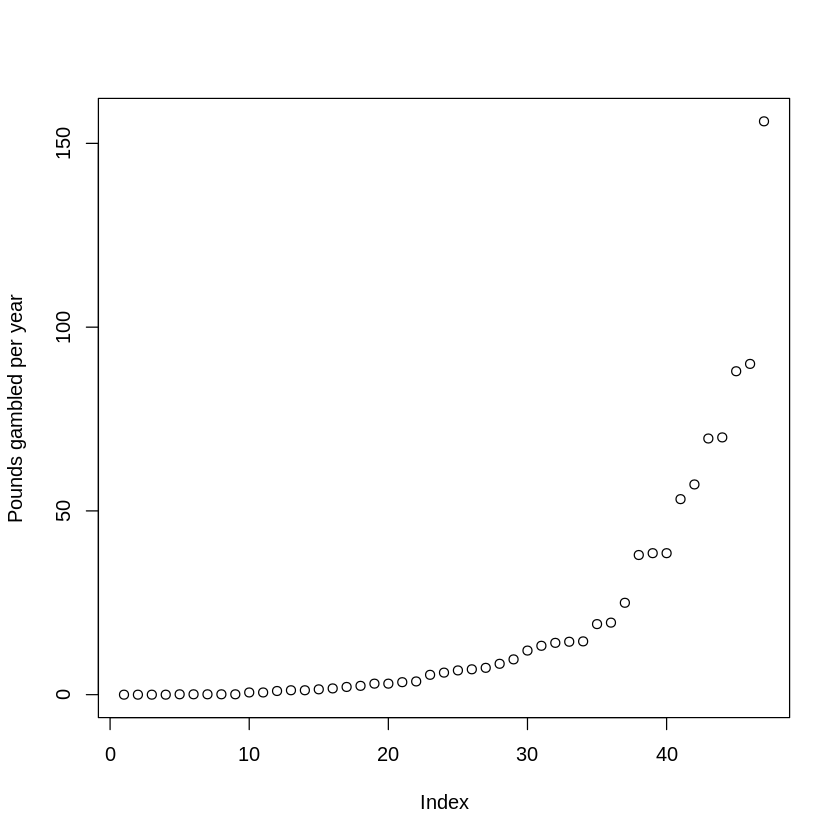

In [6]:
plot(sort(teengamb$gamble), ylab="Pounds gambled per year", main="")

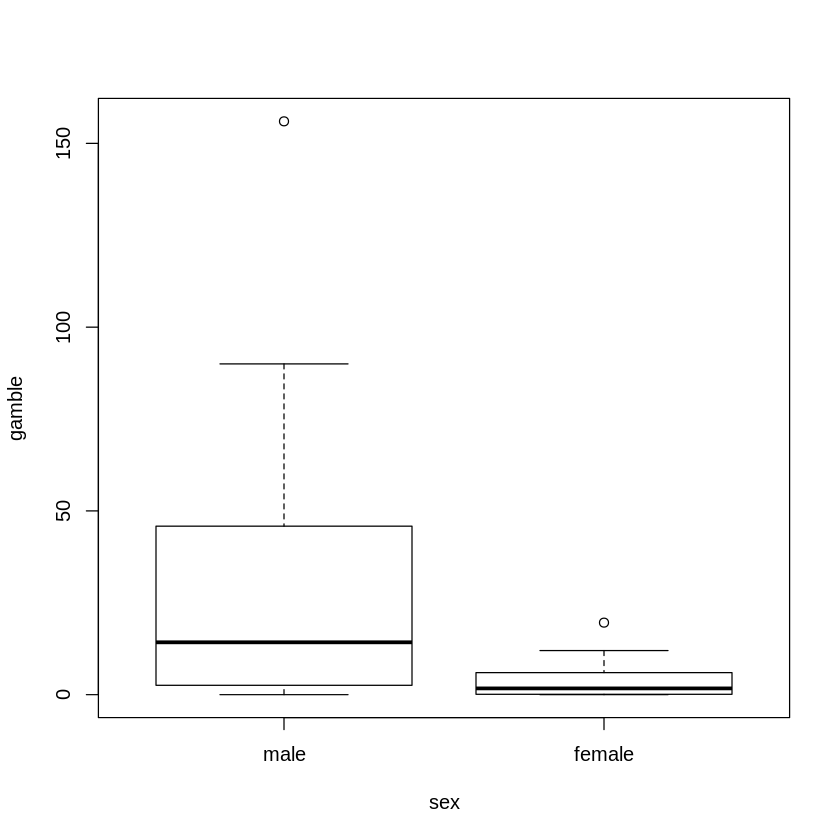

In [7]:
plot(gamble ~ sex, teengamb)

In [8]:
#require(ggplot2)
ggplot(teengamb,aes(x=income,y=gamble,shape=sex))+geom_point(size=1)+facet_grid(~sex)
ggplot(teengamb,aes(x=verbal,y=gamble,shape=sex))+geom_point(size=1)+facet_grid(~sex)

ERROR: Error in ggplot(teengamb, aes(x = income, y = gamble, shape = sex)): could not find function "ggplot"


### Findings

We see that most of the teens gabled very little. With summary and the pounds gambled per week plat showing ~75% of the teens gambled less than 20 pounds. 

Additionally the male teens showed a much stronger inclination to gambling than their female peers. Lastly, there is a weak inverse relationship between verbal accuity and gambling inclination.

## 1.2 Explore uswages

In [ ]:
data(uswages, package="faraway")
head(uswages)

In [ ]:
# Change categorical labels from 0 to white and 1 to black
uswages$race <- factor(uswages$race)
levels(uswages$race) <- c("white","black")
# Change categorical label for part time
uswages$type <- factor(uswages$pt)
levels(uswages$type) <- c("ft","pt")


In [ ]:
long_uswages <- uswages %>% gather(Region, Y, ne:we)

In [ ]:
long_uswages

In [ ]:
long_uswages[order(long_uswages$wage),]

In [ ]:
nrow(filter(uswages, pt == 0))

In [ ]:
long_uswages_2 = long_uswages[long_uswages$Y != 0, ]

In [ ]:
unique(uswages$exp)

In [ ]:
head(long_uswages_2)

In [ ]:
within(long_uswages_2, rm(Y))

## 3. Explore prostate

In [ ]:
data(prostate, package="faraway")
head(prostate)

## 4. Explore sat

In [ ]:
data(sat, package="faraway")
head(sat)

## 5. Explore divusa

In [ ]:
data(divusa, package="faraway")
head(divusa)